13016213 Data Structures and Algorithms Laboratory

**NOTE** click here to select this cell, press Esc-Enter to enter cell edit mode, press Shift-Enter to put the cell back to display mode.

#### Name: *Araya Siriadun*

#### Student ID: *58090046*

Laboratory 1: Algorithm Analysis
===

## Overview

In this course, we are interested in the design of "efficient" data structures and algorithms. **Running time** is a natural measure of "efficiency" of algorithms -- efficient algorithmic solutions should run as fast as possible.

The running time of an algorithm depends on several complicating factors. However, in general, the running time of an algorithm and data structure operation increases with the input size.

In this lab, we will study how to make quantitative measurements of running time as a function of the input size.

## Experimental Studies of the Running Time
Given an implementation of an algorithm, we can measure its running time by executing it on various test inputs and recording the time spent during each executing.

A simple way to record execution time in Python is to use the clock() function in the time module, as shown in the **Stopwatch** class below.

In [1]:
import time

class Stopwatch:
    def __init__(self):
        self._creationTime = time.clock()
    def elapsedTime(self):
        return time.clock() - self._creationTime

Measuring elapsed time of executing a block of code can be done easily with an addition of just two lines of source code.
* at the begining of the code block, create the Stopwatch object.
* at the end of the code block, call the elapsedTime() method of the Stopwatch object.

In [2]:
def testStopwatch():
    N = 1000
    total = 0.0
    
    # create the Stopwatch object
    watch1 = Stopwatch()
    
    ### Begin of Code Block ###
    
    for i in range(1,N+1):
        total += i**2
    
    ### End of Code Block ###
    
    # stop the watch! by calling elapsedTime()
    elapsed_time = watch1.elapsedTime()
    
    print("It took {0} seconds to execute the code.".format(elapsed_time))    

In [3]:
### TODO 1
# 1. call the testStopwatch() function typing 'testStopwatch()'
# 2. press 'shift-Enter' to execute the instruction

testStopwatch()


It took 0.0004396284882681631 seconds to execute the code.


## Case Study: Three-Sum Problem

As an example, let us use the Stopwatch class to measure the running time of a function **ThreeSum** below. The function counts the number of triples in an input array of N integers that sum to $0$. 

In [4]:
def ThreeSum(A):
    """Count triples in A that sum to 0.
        A    input array of integers.
    
    Returns:
        cnt  count of triples that sum to 0.
    """
    N = len(A)
    cnt = 0
    for i in range(N):
        for j in range(i + 1, N):
            for k in range(j + 1, N):
                if A[i] + A[j] + A[k] == 0: 
                    cnt += 1
                    
    return cnt

Let's start with a small input size of $8$ integers.

In [5]:
# define an array of 8 integers
A = [30, -30, -20, -10, 40, 0, 10, 5]

### TODO 2
# call ThreeSum with input A 
# Press shift-Enter to see the result
# You should see "4" on the Out[.] cell.

ThreeSum(A)


4

### Measuring the Running Time of ThreeSum

As stated earlier, we are interested in finding the relationships between the running time of the algorithm and the input size $N$. This can be achieved by executing the algorithm over the input data of various sizes and plotting the running time against the input size.

To automate our experiment, we need to write some helper functions. First, we need to be able to generate a 1-D array of $N$ random integers. 

In [6]:
### TODO 3
# Implement the function uniformInts.

import random

def uniformInts(N, a, b):
    """Generate a list of N integers selected uniformly from range [a, b]
        N  size of the output array (i.e. the number of integers to be generated)
        a  lower bound of the random integer
        b  upper bound of the random integer
    
    Returns:
        A  array of N integers (a <= A[i] <= b)
    """
    # replace the 'pass' statement with your code
    
    A = []
    for i in range(N):
        A += [random.randint(a,b)]
    return A

After implementing the function *uniformInts*, test your implementation by executing code provided in the next cell.

In [7]:
### TODO 4
#
# Generate an array of 8 integers from -1000 to 1000
# 
# call the uniformInts function
# press shift-Enter to execute your code

uniformInts(8,-1000,1000)


[-618, -571, 496, 503, -111, 645, 108, -364]

Next, we implement the *timeTrial()* function that would execute and measure running time of *an instance* of the three-sum problem.

In [8]:
### TODO 5
#
# Add stopwatch to the following function so that we can measure elapsed time 
# of executing the function ThreeSum(A)
#

def timeTrial(n):
    """Measure time to solve an instance three-sum problem of size n.
        n    the problem size (i.e. the number of integers)
    
    Returns:
        elasped_time    the estimated execution time of ThreeSum 
    
    """
    A = uniformInts(n, -1000, 1000)
    elapsed_time = 0
    watch2 = Stopwatch()
    ###
    count = ThreeSum(A)
    ###
    elapsed_time = watch2.elapsedTime()
    return elapsed_time

As the final step, we write a function for executing and measuring the running time of the ThreeSum function at various input size. 

In [9]:
def runtimeTest(maxN=512):
    """Measure runtime to solve three-sum problem of various size.
    
    Returns:
        X  a list of problem size
        Y  a list of time taken to solve three-sum 
    """
    X = []
    Y = []
    # start with 4 integers
    n = 4
    while (n <= maxN):
        X.append(n)
        Y.append(timeTrial(n))
        n *= 2
    return X, Y

In [10]:
### TODO 6
#
# execute the function runtimeTest, with maxN=32

X, Y = runtimeTest(32)

# check your result, by press shift-Enter
# you should see a list of integer (X; input size), and a list of real numbers (Y; elapsed time)

print(X)
print(Y)

[4, 8, 16, 32]
[8.98073760069451e-06, 2.5231596117336608e-05, 0.00015438315590010632, 0.0010588717285529015]


In [11]:
### TODO 7
# 
# execute the function runtimeTest, with maxN=1024

X, Y = runtimeTest(1024)

# before proceeding to the next step, make sure that 
## your X variable contains [4, 8, 16, 32, 64, 128, 256, 512, 1024]
## your Y variable contains runnting time of each execution instance.

print(X)
print(Y)

[4, 8, 16, 32, 64, 128, 256, 512, 1024]
[9.40839177232533e-06, 3.977183794567907e-05, 0.00017106166858660288, 0.0024021334811319406, 0.016013082796414224, 0.12313660386137393, 0.5799135967511972, 4.184938618796767, 32.106058234523836]


### Visualizing your Experimental Results

Now that we have the data relating the running time of ThreeSum function to the input size, the most intuitive way to study how our simple algorithm performs is by plotting the running time of each execution against the input size.

In Python, we can use the *matplotlib* library to programmatically plot our data. 
First we need to import the library:

In [12]:
# First, import the library
import matplotlib.pyplot as plt
# this line tells iPython to show the plot inside the Notebook
%matplotlib inline


To plot the data on a normal scale, execute the following instructions.

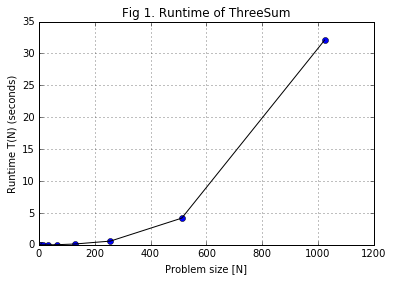

In [13]:
# Normal-scale plot

plt.plot(X, Y, 'bo', X, Y, 'k')
plt.grid(True)
plt.title('Fig 1. Runtime of ThreeSum')
plt.xlabel('Problem size [N]')
plt.ylabel('Runtime T(N) (seconds)')
plt.show()

As can be seen from the above plot, reasoning about the relationship between running time and the problem size using the normal scale plotting is not so straightforward. To better see the relationship, it helps to try plotting your data on a log-log scale.

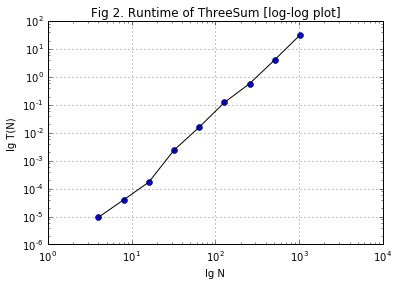

In [14]:
# log-log scale plot

plt.loglog(X, Y, 'bo', X, Y, 'k')
plt.grid(True)
plt.title('Fig 2. Runtime of ThreeSum [log-log plot]')
plt.xlabel('lg N')
plt.ylabel('lg T(N)')
plt.show()

## Questions 1

If your work so far is correct, you should see a straight line on your log-log plot in Fig 2. 

**(a)** Estimate the slope of the straight line on your log-log plot in Fig 2.

In [15]:
### TODO
# write your answer for Question 1(a) in the cell below.

import math

m = math.log(max(Y)/min(Y))/math.log(max(X)/min(X))
print(m)

2.7127992599335986


*Answer: ≈2.712*

**(b)** What is the equation of the straight line on your log-log plot in Fig 2.  

In [16]:
### TODO
# write your answer for Question 1(b) below.

b = min(Y)-m*min(X)
print("y =", "%f"%m + "x" + "%+f"%b)

y = 2.712799x-10.851188


*Answer: y = 2.712x - 10.851*

**(c)** From your experimental results in Fig 1 and Fig 2., write the running time as a function of the input size.

In [122]:
### TODO
# write your answer for Question 1(c) below.

def running_time(N):
    T = N ** m * 10 ** (math.log(Y[X.index(N)],10) - m * math.log(X[X.index(N)],10))
    return T

*Answer: F(input_size) = (input_size^slope)(10^intercept_point)*

**(d)** What is the order of growth of the running time of ThreeSum function ?

In [7]:
### TODO
# write your answer for Question 1(d) below.

def ThreeSum(A):
    N = len(A)
    cnt = 0
    ### We have 3 for loops: ###
    for i in range(N): # Executes N times
        for j in range(i + 1, N): # Executes N-i times for each iteration of outer loop
            for k in range(j + 1, N): # Executes N-j times for each iteration of outer loop
                if A[i] + A[j] + A[k] == 0:
                    cnt += 1
                    
    return cnt

*Answer: Total time taken will be N*(N-i)*(N-j) = O(N^3)*


## Programming Quiz 1

### Computing **prefix averages** of a sequence of numbers.

Given a sequence $S$ consisting of $n$ numbers, we want to compute a sequence $A$ such that $A[j]$ is the average of elements $S[0],...,S[j]$, for $j=0,...,n-1$, that is,

$$
A[j] = \frac{\sum_{i=0}^{j} S[i]}{j+1}
$$

Computing prefix averages are used frequently in economics and statistics. For example, given the year-by-year returns of a mutual fund, ordered from recent to past, an investor will typically want to see the fund's average annual returns for the most recent 3-year, 5-year, and so on.

**(a)** Design and implement a linear time algorithm for computing prefix averages of a sequence of $n$ numbers.

In [17]:
def prefix_average(S):
    """
    Compute prefix averages.
        
        S    an input sequence of n numbers.
    Returns:
        A    a list such that, for all j, A[j] equals average of S[0],..,S[j].
    """
    
    A = []
    B = 0
    for j in range(len(S)):
        B += S[j]
        A[j] = B / (j+1) 
    return A

**(b)** Write a function that measures running time of the **prefix_average()** function for the input size of 4, 8, 16, 32, 64, 128, 256, 512, 1024. (use function *uniformInts()* to generate the input sequence S.)

In [18]:
def exec_PrefixAverage(n):
    """Measure time to solve an instance Prefix Averages problem of size n.
        n    the problem size (i.e. the number of integers)
    
    Returns:
        elasped_time    the estimated execution time of Prefix Averages 
    
    """
    watch3 = Stopwatch()
    
    S = uniformInts(n, -1000, 1000)
    elapsed_time = 0
    prefix_average(S)

    elapsed_time = watch3.elapsedTime()
    
    return elapsed_time

def test_PrefixAverages(maxN=1024):
    """Measure runtime to solve Prefix Average problem of various size.
    
    Returns:
        X  a list of problem size
        Y  a list of time taken to compute prefix averages
    """
    X = []
    Y = []
    # start with 4 integers
    n = 4

    while (n <= maxN):
        X.append(n)
        Y.append(exec_PrefixAverage(n))
        n *= 2
    return X, Y

**(c)** Plot the running time of your **prefix_average()** function against the input size.

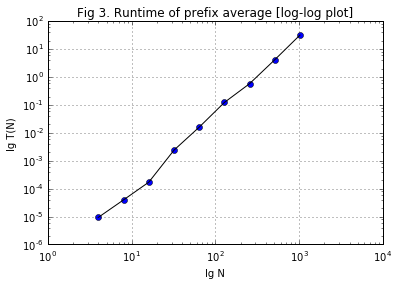

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.loglog(X, Y, 'bo', X, Y, 'k') 
plt.grid(True) 
plt.title('Fig 3. Runtime of prefix average [log-log plot]') 
plt.xlabel('lg N') 
plt.ylabel('lg T(N)') 
plt.show()